In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
df=pd.read_csv("TSLA.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,17.481333,17.533333,17.188000,17.276667,17.276667,39163500
1,2015-07-13,17.483334,17.503332,17.070000,17.477333,17.477333,44404500
2,2015-07-14,17.473333,17.732668,17.367332,17.709999,17.709999,28614000
3,2015-07-15,17.782667,17.832666,17.472000,17.542667,17.542667,30324000
4,2015-07-16,17.614668,17.813334,17.544001,17.778667,17.778667,24240000


In [14]:
training = df.iloc[:800, 1:2].values
testing = df.iloc[800:, 1:2].values

In [15]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

In [16]:
x_train = []
y_train = []
for iter in range(60, 800):
    x_train.append(training_scaled[iter-60:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
24/24 [==============================] - 11s 100ms/step - loss: 0.0638
Epoch 2/20
24/24 [==============================] - 2s 100ms/step - loss: 0.0169
Epoch 3/20
24/24 [==============================] - 2s 100ms/step - loss: 0.0121
Epoch 4/20
24/24 [==============================] - 3s 123ms/step - loss: 0.0121
Epoch 5/20
24/24 [==============================] - 3s 138ms/step - loss: 0.0113
Epoch 6/20
24/24 [==============================] - 2s 102ms/step - loss: 0.0110
Epoch 7/20
24/24 [==============================] - 2s 100ms/step - loss: 0.0110
Epoch 8/20
24/24 [==============================] - 2s 101ms/step - loss: 0.0119
Epoch 9/20
24/24 [==============================] - 3s 125ms/step - loss: 0.0129
Epoch 10/20
24/24 [==============================] - 3s 131ms/step - loss: 0.0095
Epoch 11/20
24/24 [==============================] - 3s 105ms/step - loss: 0.0096
Epoch 12/20
24/24 [==============================] - 2s 101ms/step - loss: 0.0111
Epoch 13/20
24/24 [=====

In [18]:
data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis = 0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1,1)
total_input = sc.transform(total_input)
x_test = []
for iter in range(60, 519):
    x_test.append(total_input[iter-60:iter, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)


(459, 60, 1)
15/15 [==============================] - 2s 40ms/step


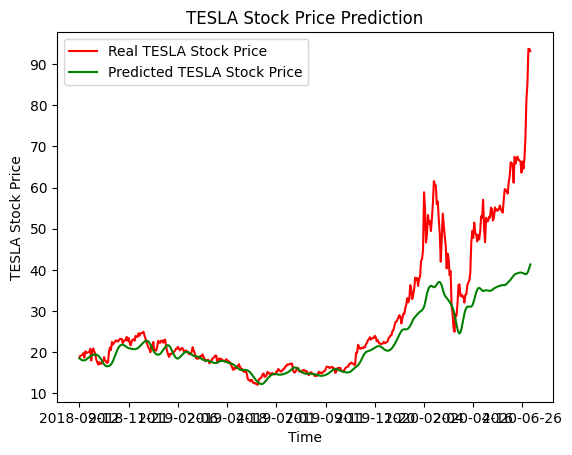

In [25]:
plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_price, color = 'green', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()